# What are the Common Trends Between Top 10 Songs from January 2020 to January 2022?
#### Authors: Isa de Luis and Luke Milroy

# Introduction
Whether it be on the radio or from following today's top artists, we've all heard the songs that top the Billboard 100 . From Taylor Swift's insightful *"All Too Well"* to Lin-Manuel Miranda's *"We Don't Talk About Bruno"* from the Academy Award Winning *Encanto*, it seems like there is noting in common between these songs, except that they made Billboard's Top 10 list within the past two years. In this essay we will use the [Billboard API](https://rapidapi.com/LDVIN/api/billboard-api/) to gather data on the top 10 songs each month from January 2020 to January 2022 and analyze the key words in each song to shed some insight in the commonalities between hit songs and see what themes make a song "popular".

Run the code cell below to ensure that this notebook pulls the most recent version of the code.

In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


To ensure that the plots display properly in this document, run the following code cell.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Methodology
### Data Gathering

The Billboard API is an API offered by [rapidAPI](https://rapidapi.com/hub) and created by the user [LDVIN](https://rapidapi.com/user/LDVIN). The API provides the Billboard chart rankings for each week, along with information on song titles, artists, and previous chart rankings. To use the API you must sign up for an API key on its homepage. Then, you can use Requests to get the Billboard Top 100 data for any day. We called the API for the last day of each month from January 31, 2020 through January 31, 2022. After getting the data, we saved it in a dictionary so we could access it later. One issue we ran into was that the API had a limited amount of calls per month, but we worked around it by saving the data in a text file where we could look at it later if we wanted to.

In [12]:

#Data Gathering From Billboard

#Copied from Billboard API
# Provides the Billboard chart rankings and information on titles, artists,
# lyrics, images, and more

import requests

url = "https://billboard-api2.p.rapidapi.com/hot-100"

dates= ["2020-01-31", "2020-02-29", "2020-03-31", "2020-04-30",\
    "2020-05-31","2020-06-30", "2020-07-31", "2020-08-31", "2020-09-30",\
    "2020-10-31", "2020-11-30", "2020-12-31", "2021-01-31", "2021-02-28",\
    "2021-03-31", "2021-04-30", "2021-05-31","2021-06-30", "2021-07-31",\
    "2021-08-31", "2021-09-30","2021-10-31","2021-11-30", "2021-12-31",\
    "2022-01-31"]

dict_keys = ["Jan 2020", "Feb 2020", "Mar 2020", "Apr 2020","May 2020",\
    "Jun 2020", "July 2020", "Aug 2020", "Sept 2020", "Oct 2020", "Nov 2020",\
    "Dec 2020", "Jan 2021", "Feb 2021", "Mar 2021", "Apr 2021", "May 2021",\
    "Jun 2021", "July 2021","Aug 2021", "Sept 2021","Oct 2021","Nov 2021",\
    "Dec 2021", "Jan 2022"]

headers = {
    "X-RapidAPI-Host": "billboard-api2.p.rapidapi.com",
    "X-RapidAPI-Key": "API-KEY"
}

index = 0
response_dict = {}

# loop through the dictionary 
while index < len(dates):
    querystring = {"range":"1-10", "date": dates[index]}
    response = requests.request("GET", url, headers=headers, params=querystring)
    response_dict[dict_keys[index]] = response.json()
    index+=1

# Print the dictionary to make sure it got the data
print(response_dict)

# Save the dictionary to a file
f = open("All_BillBoard_data.txt", "w")
with open("All_BillBoard_data.txt", "w") as f:
    f.write(str(response_dict))



{'Jan 2020': {'info': {'category': 'Billboard', 'chart': 'HOT 100', 'date': '2020-02-01', 'source': 'Billboard-API'}, 'content': {'1': {'rank': '1', 'title': 'The Box', 'artist': 'Roddy Ricch', 'weeks at no.1': '3', 'last week': '1', 'peak position': '1', 'weeks on chart': '7', 'detail': 'same'}, '2': {'rank': '2', 'title': 'Life Is Good', 'artist': 'Future Featuring Drake', 'last week': '2', 'peak position': '2', 'weeks on chart': '2', 'detail': 'same'}, '3': {'rank': '3', 'title': 'Godzilla', 'artist': 'Eminem Featuring Juice WRLD', 'last week': 'None', 'peak position': '3', 'weeks on chart': '1', 'detail': 'new'}, '4': {'rank': '4', 'title': 'Circles', 'artist': 'Post Malone', 'last week': '3', 'peak position': '1', 'weeks on chart': '21', 'detail': 'down'}, '5': {'rank': '5', 'title': 'Memories', 'artist': 'Maroon 5', 'last week': '4', 'peak position': '2', 'weeks on chart': '18', 'detail': 'down'}, '6': {'rank': '6', 'title': '10,000 Hours', 'artist': 'Dan + Shay & Justin Bieber',

### Simplifying the Dictionary

After accessing all the data, we realized that we had more information we needed and that made looking through the data difficult and tedious. The only information we really wanted was the song's title, rank, and artist. Below, we wrote code to get rid of any information to get rid of anything other than title, rank, and artist. 

In [ ]:
    
# Simplifying the dictionary!

# Define a list of all the keys we want deleted
to_delete = ["rank", "last week", "peak position", \
    "weeks on chart", "detail", "weeks at no.1"]

for item in dict_keys:
    response_dict[item].pop("info")
    for i in range(1,11):
        if i == 1:
            for element in to_delete:
                response_dict[item]["content"][str(i)].pop(element)
        else:
            for element in to_delete[0:5]:
                response_dict[item]["content"][str(i)].pop(element)

print(response_dict)

### Sentiment Analysis

Our original plan to analyze the data was to use the [MusixMatch API](https://developer.musixmatch.com/) to access the sentiment analysis they had already done on all the songs in their library. However, after running into many installation issues, we decided to pivot and just to the sentiment analysis by hand. Our first step was going through every song in our dictionary, looking at the lyrics from [Genius](https://genius.com/), and picking out the six words we felt were most influential in the songs meaning. We saved each of these words in a list for each song, then saved those lists in dictionaries for each month that we looked at. 

In [20]:
#Sentiment Analysis

# Lists of the 6 key words in each song
drivers_liscense = ["doubt", "insecure", 'crying', 'sorry', 'gone', "blue"]
mood =  ["mood", "arguin'", "depression", "love", " ain't playing", "victim"]
blinding_lights = ["love", "touch", "empty", "lights", "trust", "drowning"]
thirty_four_plus_thirty_five = ["cravin'", "show", "energy", "fuck", "ride",\
     "shake"]
levitating_remix = ["baby", "music", "want", "glitter", "shining","love"] 
go_crazy = ["babe", "miss", "life", "change", "amazing", "love", "real"] 
positions = ["heaven", "love", "babe", "positions", "infinite", "perfect"]
holy = ["sinners", "saint", "holy", "altar","love", "believer", "union"]
good_days = ["good", "rest", "bummed", "best", "bear", "smile"] 
bang = ["jumpin'", "ride", "bang", "young", "grow", "try"] 
up = ["bomb", "lit", "good", "rock", "poppin'", "sex"] 
save_your_tears_orig = ["dancing", "happy", "surprise", "cry", "broke", "tears"]
calling_my_phone = ["'lone", "hurtin", "gone", "dark", "pain", "traumatized"]
peaches = ["baby", "touch", "lift", "torture", "baggage", "yours"]
leave_the_door_open = ["dancin'", "romancin'", "heart", "love", "kissin'", \
    "cuddlin'"]
whats_next = ["change", "fame", "boss", "life", "highs", "truth"]
what_you_know_bout_love = ["love", "baby", "need", "heart", "like", "us"]
rapstar = ["winnin'", "high", "hurt","anxiety", "loss", "scar"]
montero = ["smiles", "cute", "romantic", "ridin'", "love", "fuckin'"]
astronaut_in_the_ocean = ["deep", "numb", "freeze", "down", "pain", "burnt"]
kiss_me_more = ["hug", "love", "cuddle", "kiss", "lip", "hickeys"]
butter = ["smooth", "heart", "melt", "sweep", "high", "baby"]
good_4_u = ["crying", "lost", "hurt", "apathy", "wound", "sociopath"]
deja_vu = ["reused", "I hate to think that I was just your type", "shit",\
    "deja vu", "was", "did"]
save_your_tears_remix = save_your_tears_orig
traitor = ["lies", "betrayed", "hurt", "cheat", "traitor", "paranoid"]
stay = ["stay", "drunk", "wasted", "fucked", "nobody", "empty-handed"]
bad_habits = ["paradise", "alone","last","bad", "lose", "burned"]
permission_to_dance = ["beating", "louder", "sing", "dance", "fools", "golden"]
industry_baby = ["champions", "lost", "top", "plaque", "Grammy", "flashy"]
levitating_orig = levitating_remix
way_2_sexy = ["sexy", "action", "diamond", "caress", "fame", "cash"]
fancy_like = ["date", "champagne-poppin'", "baby", "fancy", "bougie", "delight"]
knife_talk = ["pistol", "bleed", "liquor", "AK-40", "slaughter", "shooters"]
thats_what_i_want = ["cuddle", "warm", "love", "sunlight", "lonely", "needs"]
easy_on_me = ["drowing", "silence", "easy", "change", "stuck", "hopes"]
shivers = ["heart", "kissed", "dancin'", "smile", "singin'", "love"] 
need_to_know = ["fuck", "baby", "need", "like", "fantasizin'", "sexual"]
all_too_well = ["remember", "gone", "grave", "lifeless", "cruel", "paralyzed"]
oh_my_god = ["fall", "terrified", "love", "right", "battle", "fight"]
heat_waves = ["happier", "fakin'", "alone", "fight", "hurt", "broken"]
smokin_out_the_window = ["alone","disbelief","cold", "die","started off", \
    "How could she do this to me?"]
all_i_want_for_christmas = ["wish", "christmas", "happy", "you", "baby", \
    "want"] 
rockin_around_the_christmas_tree = ["rockin", "party", "sentimental", "jolly"\
    "happy", "merrily"]
jingle_bell_rock =["rock", "hop","chime", "dancin", "swell", "jingle"]
a_holly_jolly_christmas = ["holly", "jolly", "best", "cheer", "kiss", \
    "mistletoe"]
its_the_most_wonderful_time = ["wonderful", "cheer", "jingle", "happiest"\
    "caroling", "parties"]
last_christmas = ["gave", "heart", "away", "tears", "special", "fool"]
feliz_navidad = ["feliz", "merry christmas", "prospero ano", \
    "bottom of my heart", "navidad", "felicidad"]
sleigh_ride =["jingling", "lovely", "together", "you", "wonderland", "snuggled"]
we_dont_talk_about_bruno = ["don't", "mischievous", "fear", "gift", "fumbling"\
    "screams"]
super_gremlin = ["superstars", "killer", "could've", "cages", "switched", \
    "wreckin'"]
pushin_p = ["pushin' p", "peace", "paranoid", "watchin'", "pockets deep", \
    "porcelains"] 
abcdefu = ["fuck off", "shit", "worst", "bitch", "A-B-C-D-E,F you",\
     "I'll never see again"]
surface_pressure = [ "indestructible", "worthless", "pressure", "flaw", \
    "crushing", "breaks"]
cold_heart = ["human", "lingers", "tempations", "cold", "heart", "hardened"]
the_box = ["box", "soul", "drugs", "key", "mojo", "playin'"]
life_is_good = ["life is good", "hunnid thousand", "cheapest", "lil bitch", \
     "turnt", "ego"]
godzilla = ["monster", "normal", "mental hospital", "against the wall", \
     "alcohol", "villain"]
circles = ["love", "seasons change", "running", "sex", "let it go", \
    "can't let go"]
memories = ["memories", "drinks", "hurts", "raise a glass", "alright", \
    "bring back you"]
ten_thousand_hours = ["dreamin'", "sweet heart", "love you", "try", \
    "ten thousand hours", "rest of my life"]
dance_monkey = ["dance", "beg", "move", "again", "one more time", "never seen"] 
someone_you_loved = ["pain", "used to", "loved", "guard down", \
    "you're not here", "hurt"]
roxanne = ["party", "fun", "gram", "attitude", "daddy's money", "pay up"]
lose_you_to_love_me = ["love", "blindy", "lose", "find", "healing", "hate"]
dont_start_now = ["moved on", "walk away", "hurt", "survive", "better", "don't"]
intentions = ["picture perfect", "asset", "love", "intentions", "gorgeous", \
    "attention"]
heartless = ["heartless", "low life", "money", "better man", "pain", \
    "back to my ways"]
adore_you = ["walk through fire", "adore you", "love me", "only thing", \
    "on my mind", "honey"]
say_so = ["focused", "in the moment", "roll with", "you want it", "say so", \
    "committed"]
toosie_side = ["slide", "dance", "passion", "satisfaction", "show you", \
    "get it"]
rockstar = ["earned", "rockstar", "pistol", "glock", "money", "mama"]
rain_on_me = ["misery", "good time", "nothing", "dry", "i'm alive", "bottled"]
savage = ["bitch", "bougie", "sassy", "stupid", "nasty", "ratchet"]
roses =  ["screaming", "turn it up", "too fast", "killed", "can't handle", \
    "lit"]
the_bigger_picture = ["chance", "shoot", "police", "grieving", "dead", \
    "killing"]
whats_poppin = ["feelin' myself", "resentment", "discouraged", "swag", "money"]
blueberry_faygo = ["shit", "draco", "pour", "hoes", "shootin'", "millions"]
watermelon_sugar = ["high", "summer feelin'", "taste", "sugar", "breathe", \
    "wonderful"]
greece = ["come with me", "fly", "rich", "treat you nice", "love me", \
    "attached"]
come_and_go = ["ruin", "go", "love", "drugs", "my fault", "alone"]
dynamite = ["heavy", "sweet", "stars", "shinin'", "light it up", "alight"]
wap = ["wet", "pussy", "everything", "hard", "fuckin'", "whores"]
laugh_now_cry_later = ["laugh", "cry", "ghost town", "half", "whole", "play"]
savage_love = ["lover", "break your heart", "kiss me", \
    "you don't give two fucks", "karma", "fallin'"]
i_hope = ["smile", "sparks", "wrecks", "cheats", "happy", "alone"]
lemonade = ["money", "rockstar", "juice", "drippin'", "risky", "fortune"]
let_it_snow = ["delightful", "kiss", "kiss me", \
    "love me so", "lights are low", "storm"]
run_rudolph_run = ["hurry", "shooting star", "merry-go-round", "reeling", \
    "got to make it", "please"]
popstar = ["popstar", "platinum", "fukin' helicopter", "Drizzy's shit",\
     "appreciate", "crown"]
life_goes_on = ["footprints", "erased", "pain", "refuse", "out", "remember"]
before_you_go = ["hurt", "hurting", "storm", "replace", "I needed to say", \
    "kills"]
monster = ["pedestal", "tear me down", "jealousy", "chip on my shoulder", \
    "unforgiveness", "break"]


JAN_2020= {1: the_box, \
            2: life_is_good, \
            3: godzilla, \
            4: circles, \
            5: memories, \
            6: ten_thousand_hours, \
            7: dance_monkey, \
            8: someone_you_loved, \
            9: roxanne, \
            10: lose_you_to_love_me}

FEB_2020 = {1: the_box, \
            2: life_is_good, \
            3: circles, \
            4: dance_monkey, \
            5: dont_start_now, \
            6: roxanne, \
            7: memories, \
            8: someone_you_loved, \
            9: intentions, \
            10: blinding_lights}

MAR_2020 = {1: the_box, \
            2: life_is_good, \
            3: circles, \
            4: dance_monkey, \
            5: dont_start_now, \
            6: roxanne, \
            7: memories, \
            8: someone_you_loved, \
            9: intentions, \
            10: blinding_lights}

APR_2020 = {1: blinding_lights, \
            2: the_box, \
            3: dont_start_now, \
            4: heartless, \
            5: circles, \
            6: life_is_good, \
            7: adore_you, \
            8: intentions, \
            9: say_so, \
            10: roxanne}

MAY_2020 = {1: rain_on_me, \
            2: savage, \
            3: rockstar, \
            4: blinding_lights, \
            5: say_so, \
            6: toosie_side, \
            7: dont_start_now, \
            8: the_box, \
            9: intentions, \
            10: life_is_good}

JUNE_2020 = {1: rockstar, \
            2: savage, \
            3: blinding_lights, \
            4: roses, \
            5: intentions, \
            6: say_so, \
            7: the_bigger_picture, \
            8: whats_poppin, \
            9: blueberry_faygo, \
            10: circles}

JULY_2020 = {1: rockstar, \
            2: whats_poppin, \
            3: popstar, \
            4: blinding_lights, \
            5: roses, \
            6: savage, \
            7: watermelon_sugar, \
            8: greece, \
            9: come_and_go, \
            10: go_crazy}

AUG_2020 = {1: dynamite, \
            2: wap, \
            3: laugh_now_cry_later, \
            4: rockstar, \
            5: blinding_lights, \
            6: whats_poppin, \
            7: watermelon_sugar, \
            8: roses, \
            9: savage_love, \
            10: before_you_go}

SEPT_2020 = {1: dynamite, \
            2: wap, \
            3: holy, \
            4: laugh_now_cry_later, \
            5: mood, \
            6: rockstar, \
            7: blinding_lights, \
            8: watermelon_sugar, \
            9: savage_love, \
            10: i_hope}

OCT_2020 = {1: mood, \
            2: wap, \
            3: laugh_now_cry_later, \
            4: blinding_lights, \
            5: savage_love, \
            6: i_hope, \
            7: dynamite, \
            8: rockstar, \
            9: holy, \
            10: lemonade}

NOV_2020 = {1: life_goes_on, \
            2: mood, \
            3: dynamite, \
            4: positions, \
            5: i_hope, \
            6: holy, \
            7: laugh_now_cry_later, \
            8: monster, \
            9: blinding_lights, \
            10: lemonade}

DEC_2020 = {1: all_i_want_for_christmas, \
            2: rockin_around_the_christmas_tree, \
            3: jingle_bell_rock, \
            4: a_holly_jolly_christmas, \
            5: its_the_most_wonderful_time, \
            6: feliz_navidad, \
            7: mood, \
            8: let_it_snow, \
            9: last_christmas, \
            10: run_rudolph_run}

JAN_2021 = {1: drivers_liscense, \
            2: mood, \
            3: blinding_lights, \
            4: thirty_four_plus_thirty_five, \
            5: levitating_remix, \
            6: go_crazy, \
            7: positions, \
            8: holy, \
            9: good_days, \
            10: bang}

FEB_2021 = {1: drivers_liscense, \
            2: up, \
            3: go_crazy, \
            4: thirty_four_plus_thirty_five, \
            5: blinding_lights, \
            6: save_your_tears_orig, \
            7: mood, \
            8: calling_my_phone,\
            9: positions, \
            10: levitating_remix}

MAR_2021 = {1: peaches, \
            2: up, \
            3: leave_the_door_open, \
            4: drivers_liscense, \
            5: save_your_tears_orig, \
            6: blinding_lights, \
            7: levitating_remix,\
            8: whats_next, \
            9: what_you_know_bout_love,\
            10: mood}

APR_2021 = {1: rapstar,\
            2: leave_the_door_open,\
            3: peaches,\
            4: montero,\
            5: levitating_remix,\
            6: save_your_tears_orig,\
            7: astronaut_in_the_ocean,\
            8: kiss_me_more,\
            9: up,\
            10: drivers_liscense}

MAY_2021 = {1: butter,\
            2: good_4_u,\
            3: deja_vu,\
            4: levitating_remix,\
            5: leave_the_door_open,\
            6: peaches,\
            7: save_your_tears_remix,\
            8: kiss_me_more,\
            9: traitor,\
            10: astronaut_in_the_ocean}

JUNE_2021 = {1: butter,\
            2: good_4_u,\
            3: levitating_remix,\
            4: kiss_me_more,\
            5: peaches,\
            6: leave_the_door_open,\
            7: save_your_tears_remix,\
            8: montero,\
            9: deja_vu,\
            10: astronaut_in_the_ocean}

JULY_2021 = {1: butter,\
            2: good_4_u,\
            3: levitating_remix,\
            4: stay,\
            5: kiss_me_more,\
            6: bad_habits,\
            7: permission_to_dance,\
            8: montero,\
            9: deja_vu,\
            10: save_your_tears_remix}

AUG_2021 = {1: stay,\
            2: bad_habits,\
            3: good_4_u,\
            4: kiss_me_more,\
            5: industry_baby,\
            6: levitating_orig,\
            7: butter,\
            8: deja_vu,\
            9: montero,\
            10: save_your_tears_remix}

SEPT_2021 = {1: stay,\
             2: industry_baby,\
             3: way_2_sexy,\
             4: bad_habits,\
             5: fancy_like,\
             6: good_4_u,\
             7: kiss_me_more,\
             8: knife_talk,\
             9: montero,\
             10: thats_what_i_want}

OCT_2021 = {1: easy_on_me,\
            2: stay,\
            3: industry_baby,\
            4: fancy_like,\
            5: bad_habits,\
            6: way_2_sexy,\
            7: shivers,\
            8: good_4_u,\
            9: need_to_know,\
            10: levitating_orig}

NOV_2021 = {1: easy_on_me,\
            2: stay,\
            3: industry_baby,\
            4: all_too_well,\
            5: oh_my_god,\
            6: shivers,\
            7: heat_waves,\
            8: bad_habits,\
            9: need_to_know,\
            10: smokin_out_the_window}

DEC_2021 = {1: all_i_want_for_christmas,\
            2: rockin_around_the_christmas_tree,\
            3: jingle_bell_rock,\
            4: a_holly_jolly_christmas,\
            5: easy_on_me,\
            6: its_the_most_wonderful_time,\
            7: last_christmas,\
            8: feliz_navidad,\
            9: stay,\
            10: sleigh_ride}

JAN_2022 = {1: we_dont_talk_about_bruno,\
            2: easy_on_me,\
            3: heat_waves,\
            4: stay,\
            5: super_gremlin,\
            6: shivers,\
            7: pushin_p,\
            8: abcdefu,\
            9: surface_pressure,\
            10: cold_heart}



After finding the key words, we had to categorize each song into a theme they fit into. We chose five themes: Happy, Angry, Sad, Love, and Angst. We originally only had the first four categories, however, after looking at some of the songs, we felt like they didn't fit into those four categories, so we added the Angst category. To categorize each song, we created a function called "mood_categorizer" within the file "sentiment_analysis.py". 

In "sentiment_analysis.py", we defined five lists for each theme with words from the songs we analyzed that fit into the themes. "mood_categorizer" looked at the words in a list passed through it as a parameter and counted up the amount of each type of word. It then returned the word type that had the greatest amount in the list. If more than one word type had the greatest amount in the list (i.e. 3 love words and 3 angry words), the function just returned the mood of the first word of the list.

We saved all of the dictionaries that we created in the code cell above into a list called ALL_DATA. Then, we looped through ALL_DATA to find the mood of each list and appended the mood at the end of the list.

In [14]:
from sentiment_analysis import mood_categorizer

ALL_DATA = [JAN_2020, FEB_2020, MAR_2020, APR_2020, MAY_2020, JUNE_2020,\
            JULY_2020, AUG_2020, SEPT_2020, OCT_2020, NOV_2020, DEC_2020, \
            JAN_2021, FEB_2021, MAR_2021, APR_2021, MAR_2021, JUNE_2021,\
            JULY_2021, AUG_2021, SEPT_2021, OCT_2021, NOV_2021, DEC_2021, \
            JAN_2022]
            
for item in ALL_DATA:
    
    for key in item:
        list = item[key]
        mood = mood_categorizer(list)

        if(len(list) == 6):
            list.append(mood)


### Results

To get our data set we counted the number of each type of song in each month dictionary. Then we used this data to graph the breakdown of songs per month, the total breakdown of songs, the breakdown of songs per year, and the breakdown of songs per season.

In [15]:
from sentiment_analysis import totals

# Creating dataframe
num_angry_songs = []
num_love_songs = []
num_happy_songs = []
num_sad_songs = []
num_angsty_songs = []

dict_keys = ["Jan 2020", "Feb 2020", "Mar 2020", "Apr 2020","May 2020",\
    "Jun 2020", "July 2020", "Aug 2020", "Sept 2020", "Oct 2020", "Nov 2020",\
    "Dec 2020", "Jan 2021", "Feb 2021", "Mar 2021", "Apr 2021", "May 2021",\
    "Jun 2021", "July 2021","Aug 2021", "Sept 2021","Oct 2021","Nov 2021",\
    "Dec 2021", "Jan 2022"]
    
for dict in ALL_DATA:

    mood_list = totals(dict)

    num_angry_songs.append(mood_list[0])
    num_love_songs.append(mood_list[1])
    num_happy_songs.append(mood_list[2])
    num_sad_songs.append(mood_list[3])
    num_angsty_songs.append(mood_list[4])


df_1 = pd.DataFrame({
    "Month": dict_keys,
    "Number of Angry Songs": num_angry_songs,
    "Number of Love Songs": num_love_songs,
    "Number of Happy Songs": num_happy_songs,
    "Number of Sad Songs": num_sad_songs,
    "Number of Angsty Songs": num_angsty_songs
    })

For this first plot, we wanted to look at the full breakdown of the amount of each song type present each month. We chose to dispay the data as bar graphs as it seemed the simplest way to visualize trends in all five categories at once.


Text(0.5, 1.0, 'Breakdown of The Amount of Each Song Type by Month')

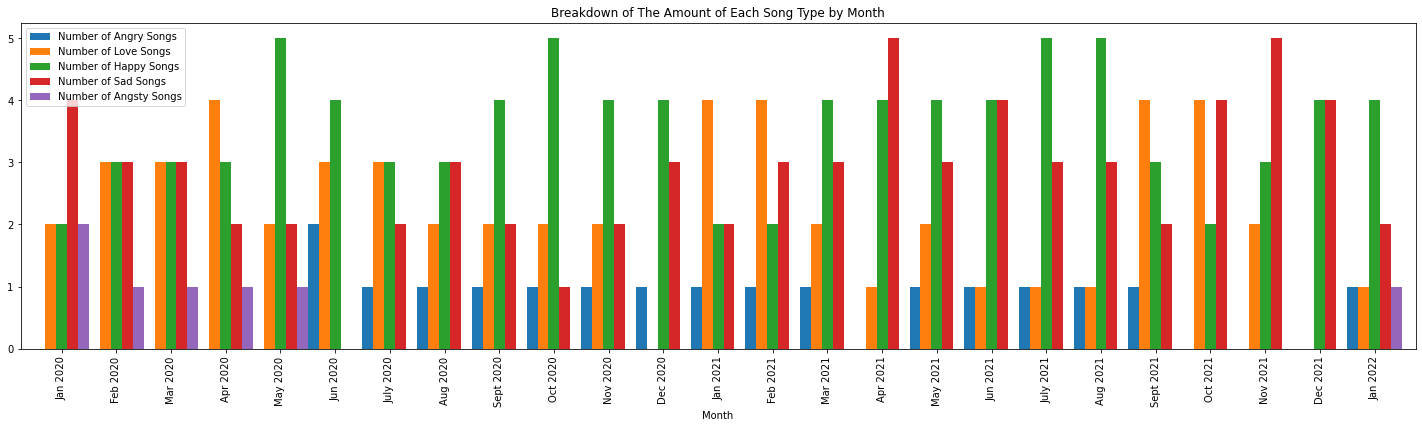

In [16]:
# Plot 1

# define data:
df_1.plot(x = "Month", y = ["Number of Angry Songs", "Number of Love Songs", \
    "Number of Happy Songs", "Number of Sad Songs", "Number of Angsty Songs"],\
    kind="bar", width = 1, figsize = (25,6))
plt.title("Breakdown of The Amount of Each Song Type by Month")

Figure 1: Bar graph representing the total breakdown of song type for the full two-year spread of song data collected from Jan 2020 - Jan 2022.



### Percentage of Each Song Type - Full Data Spread

Alongside looking at the breakdown of each each song type per month, we were also interested in looking at the overall breakdown of each song type compared to the total amount of songs. 


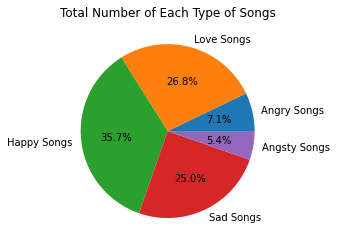

In [18]:
# Plot 2-- Total Breakdown of Each Song Type
sums = [sum(num_angry_songs), sum(num_love_songs), sum(num_happy_songs), \
    sum(num_sad_songs), sum(num_angsty_songs)]
# Plot data
song_types = 'Angry Songs', 'Love Songs', 'Happy Songs', 'Sad Songs', \
    'Angsty Songs'
popularity = sums


colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"]

# Plot
plt.pie(popularity, labels = song_types, colors = colors, autopct='%.1f%%')
plt.title("Total Number of Each Type of Songs")
plt.show()

Figure 2: Pie chart representing the percentage breakdown of each song type for the full two-year data spread.

### Percentage of Each Song Type - Annual 

For the next two graphs, we broke our data down into annual song data and again looked at how the percentages of each song type compared to the overall number of songs, though this time we compared the number of each song type only to the total amount for each repsetive year's dataset. We decided to look at percentage data by year alongside percentage data for the full dataset to understand just how much the song types that were popular each year played into what things looked liked for our full time-span. 


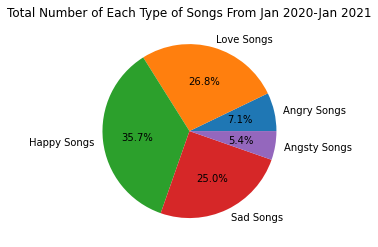

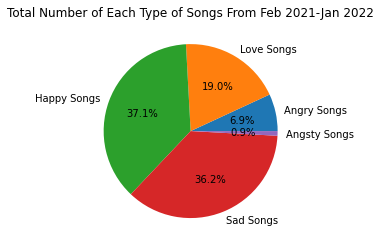

In [19]:
# Plot Three-- Breakdown of Each Song Type From Jan 2020-Jan 2021
from sentiment_analysis import totals

# Define the data:

DATA_SET = [JAN_2020, FEB_2020, MAR_2020, APR_2020, MAY_2020, JUNE_2020, \
    JULY_2020, AUG_2020, SEPT_2020, NOV_2020, DEC_2020, JAN_2021]

num_angry_songs = []
num_love_songs = []
num_happy_songs = []
num_sad_songs = []
num_angsty_songs = []

for dict in DATA_SET:

    mood_list = totals(dict)

    num_angry_songs.append(mood_list[0])
    num_love_songs.append(mood_list[1])
    num_happy_songs.append(mood_list[2])
    num_sad_songs.append(mood_list[3])
    num_angsty_songs.append(mood_list[4])

sums = [sum(num_angry_songs), sum(num_love_songs), sum(num_happy_songs), \
    sum(num_sad_songs), sum(num_angsty_songs)]



colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"]

# Plot
plt.pie(sums, labels = song_types, colors = colors, autopct='%.1f%%')
plt.title("Total Number of Each Type of Songs From Jan 2020-Jan 2021")
plt.show()

# Plot Four-- Breakdown of Each Song Type From Feb 2021-Jan 2022
from sentiment_analysis import totals

# Define the data:

DATA_SET = [FEB_2021, MAR_2021, APR_2021, MAY_2021, JUNE_2021, JULY_2021, \
    AUG_2021, SEPT_2021, OCT_2021, NOV_2021, DEC_2021, JAN_2022]

num_angry_songs = []
num_love_songs = []
num_happy_songs = []
num_sad_songs = []
num_angsty_songs = []

for dict in DATA_SET:

    mood_list = totals(dict)

    num_angry_songs.append(mood_list[0])
    num_love_songs.append(mood_list[1])
    num_happy_songs.append(mood_list[2])
    num_sad_songs.append(mood_list[3])
    num_angsty_songs.append(mood_list[4])

sums = [sum(num_angry_songs), sum(num_love_songs), sum(num_happy_songs), \
    sum(num_sad_songs), sum(num_angsty_songs)]

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"]

# Plot
plt.pie(sums, labels = song_types, colors = colors, autopct='%.1f%%')
plt.title("Total Number of Each Type of Songs From Feb 2021-Jan 2022")
plt.show()

Figures 3 & 4:  Pie charts representing the percentage breakdown of each song type for the 2020 year and 2021 year.

#### Seasonal Breakdown

For plot 5, we were curious if there were any patterns to the types of songs people listened to by season. To explore this, we split our data into 3-month segments to represent each season - Winter was Dec-Feb, Spring was Mar-May, Summer was Jun-Aug, and Fall was Sept-Nov. 

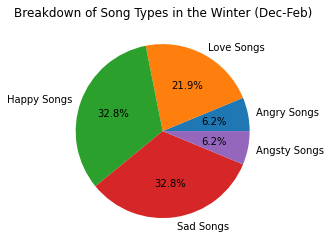

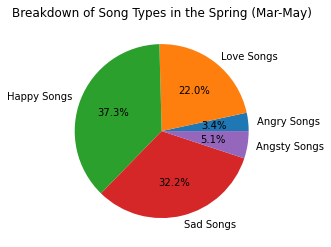

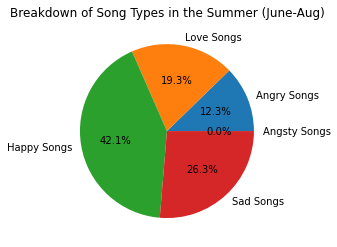

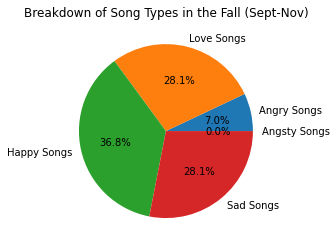

In [39]:
# Plot Five-- Breakdown of Each Song Type by Season

# Winter Months: Dec, Jan, Feb
# Spring: Mar, Apr, May
# Summer: Jun, Jul, August
# Fall: Sept, Oct, Nov

WINTER_MONTHS = [DEC_2020, DEC_2021, JAN_2020, JAN_2021, JAN_2022, FEB_2020,\
    FEB_2021]

SPRING_MONTHS = [MAR_2020, MAR_2021, APR_2020, APR_2021, MAY_2020, MAY_2021]
SUMMER_MONTHS = [JUNE_2020, JUNE_2021, JULY_2020, JULY_2021, AUG_2020, AUG_2021]
FALL_MONTHS = [SEPT_2020, SEPT_2021, OCT_2020, OCT_2021, NOV_2020, NOV_2021]

# Winter
num_angry_songs = []
num_love_songs = []
num_happy_songs = []
num_sad_songs = []
num_angsty_songs = []

for dict in WINTER_MONTHS:
    
    mood_list = totals(dict)

    num_angry_songs.append(mood_list[0])
    num_love_songs.append(mood_list[1])
    num_happy_songs.append(mood_list[2])
    num_sad_songs.append(mood_list[3])
    num_angsty_songs.append(mood_list[4])

sums = [sum(num_angry_songs), sum(num_love_songs), sum(num_happy_songs), \
    sum(num_sad_songs), sum(num_angsty_songs)]

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"]

# Plot
plt.pie(sums, labels = song_types, colors = colors, autopct='%.1f%%')
plt.title("Breakdown of Song Types in the Winter (Dec-Feb)")
plt.show()

# Spring
num_angry_songs = []
num_love_songs = []
num_happy_songs = []
num_sad_songs = []
num_angsty_songs = []

for dict in SPRING_MONTHS:
    
    mood_list = totals(dict)

    num_angry_songs.append(mood_list[0])
    num_love_songs.append(mood_list[1])
    num_happy_songs.append(mood_list[2])
    num_sad_songs.append(mood_list[3])
    num_angsty_songs.append(mood_list[4])

sums = [sum(num_angry_songs), sum(num_love_songs), sum(num_happy_songs), \
    sum(num_sad_songs), sum(num_angsty_songs)]

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"]

# Plot
plt.pie(sums, labels = song_types, colors = colors, autopct='%.1f%%')
plt.title("Breakdown of Song Types in the Spring (Mar-May)")
plt.show()

# Summer
num_angry_songs = []
num_love_songs = []
num_happy_songs = []
num_sad_songs = []
num_angsty_songs = []

for dict in SUMMER_MONTHS:
    
    mood_list = totals(dict)

    num_angry_songs.append(mood_list[0])
    num_love_songs.append(mood_list[1])
    num_happy_songs.append(mood_list[2])
    num_sad_songs.append(mood_list[3])
    num_angsty_songs.append(mood_list[4])

sums = [sum(num_angry_songs), sum(num_love_songs), sum(num_happy_songs), \
    sum(num_sad_songs), sum(num_angsty_songs)]

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"]

# Plot
plt.pie(sums, labels = song_types, colors = colors, autopct='%.1f%%')
plt.title("Breakdown of Song Types in the Summer (June-Aug)")
plt.show()

# Fall
num_angry_songs = []
num_love_songs = []
num_happy_songs = []
num_sad_songs = []
num_angsty_songs = []

for dict in FALL_MONTHS:
    
    mood_list = totals(dict)

    num_angry_songs.append(mood_list[0])
    num_love_songs.append(mood_list[1])
    num_happy_songs.append(mood_list[2])
    num_sad_songs.append(mood_list[3])
    num_angsty_songs.append(mood_list[4])

sums = [sum(num_angry_songs), sum(num_love_songs), sum(num_happy_songs), \
    sum(num_sad_songs), sum(num_angsty_songs)]

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"]

# Plot
plt.pie(sums, labels = song_types, colors = colors, autopct='%.1f%%')
plt.title("Breakdown of Song Types in the Fall (Sept-Nov)")
plt.show()

Figure 5: Pie charts representing the percentage breakdown of song type for each season. Seasons were broken down into 3-month segments (Dec-Feb, Mar-May, Jun-Aug, Sept-Nov).

### Conclusion

Looking at our data, we have found some interesting trends. Taking a further look at the seasonal data, we found that the breakdown of what types of songs were present on the Top 10 list were fairly consistent, with the most flutuation being between the amount of happy vs. sad songs present on any given list. We found that ther was a tendency for happy songs to be most present in the summer months, and sad songs to be most present in the winter and spring months. We were surpried to find that songs we considered to be "angsty" were exclusively present in the the winter and spring months during the beginning of 2020, where we had originally hypothesized that there would be a greater amount of those songs present in the summer months and more consitently throughout the two year period. The consistency of angry songs being present for most of the two year period was also a bit surprising, 
